## This notebook contains all the code necessary to recreate Figure 4

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Define the path to the datasets that store the figure data
stem = "../Data/"

# This cell is used to recreate Figure 4a. 
The data is saved in a nc file called Figure4_data.nc

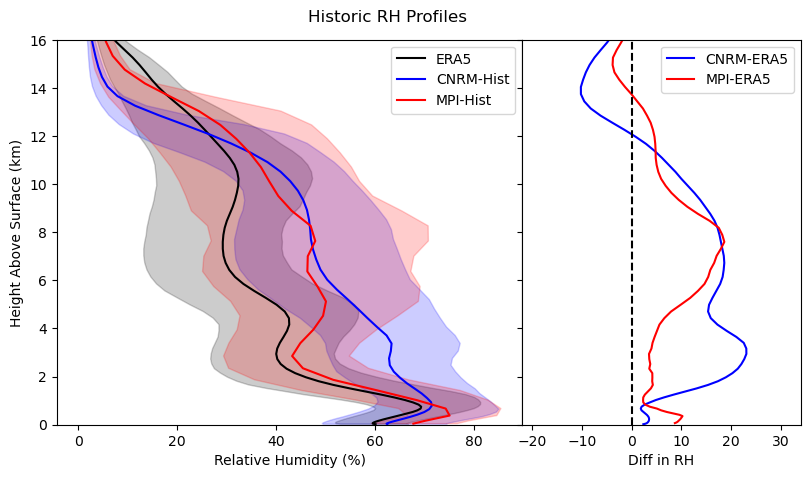

In [9]:
# Load the dataset
ds = xr.open_dataset(f"{stem}/Figure4_data.nc")

# Set the figure size and create subplots with shared y-axis
plt.rcParams["figure.figsize"] = [12, 5]
fig, axs = plt.subplots(1, 2, sharey=True)

# Adjust the space between the subplots
fig.subplots_adjust(wspace=0)

# Adjust the size of the second subplot to make it smaller
chartBox = axs[1].get_position()
axs[1].set_position([chartBox.x0, chartBox.y0, chartBox.width * 0.6, chartBox.height])

# Extract geopotential height and RH data
ERA5_z = ds['ERA5_geopotential_height'].values
CNRM_hist_z = ds['CNRM-Hist_geopotential_height'].values
MPI_hist_z = ds['MPI-Hist_geopotential_height'].values
ERA5_RH = ds['ERA5_RH'].values
CNRM_hist_RH = ds['CNRM-Hist_RH'].values
MPI_hist_RH = ds['MPI-Hist_RH'].values

# Extract 25th and 75th percentiles for RH
ERA5_p25 = ds['ERA5_25th_Percentile_of_RH'].values
ERA5_p75 = ds['ERA5_75th_Percentile_of_RH'].values
CNRM_hist_p25 = ds['CNRM-Hist_25th_Percentile_of_RH'].values
CNRM_hist_p75 = ds['CNRM-Hist_75th_Percentile_of_RH'].values
MPI_hist_p25 = ds['MPI-Hist_25th_Percentile_of_RH'].values
MPI_hist_p75 = ds['MPI-Hist_75th_Percentile_of_RH'].values

# Extract difference data
mpi_diff = ds['MPI-hist_ERA5_RH_diff'] 
cnrm_diff = ds['CNRM-hist_ERA5_RH_diff']

# Plot RH profiles and their percentiles
axs[0].plot(ERA5_RH, ERA5_z, color='black', label='ERA5')
axs[0].plot(CNRM_hist_RH, CNRM_hist_z, color='blue', label='CNRM-Hist')
axs[0].plot(MPI_hist_RH, MPI_hist_z, color='red', label='MPI-Hist')
axs[0].fill_betweenx(ERA5_z, ERA5_p25, ERA5_p75, color='black', alpha=0.2)
axs[0].fill_betweenx(CNRM_hist_z, CNRM_hist_p25, CNRM_hist_p75, color='blue', alpha=0.2)
axs[0].fill_betweenx(MPI_hist_z, MPI_hist_p25, MPI_hist_p75, color='red', alpha=0.2)

# Plot RH differences from ERA5
axs[1].plot(cnrm_diff, ERA5_z, color='blue', label='CNRM-ERA5')
axs[1].plot(mpi_diff, ERA5_z, color='red', label='MPI-ERA5')
axs[1].plot([0, 0], [0, 16], linestyle='--', color='black')  # Dashed black line at the center

# Set titles, labels, and limits
fig.suptitle('Historic RH Profiles', x=0.4, y=0.94)
axs[0].set_ylim(0, 16)
axs[0].set_xlabel('Relative Humidity (%)')
axs[0].set_ylabel('Height Above Surface (km)')
axs[0].legend()
# axs[0].set_xlim(200, 305)

axs[1].set_ylim(0, 16)
axs[1].set_xlabel('Diff in RH')
axs[1].set_xlim(-22,34)
axs[1].legend()

# This cell is used to recreate Figure 4b. 
The data is saved in a nc file called Figure4_data.nc

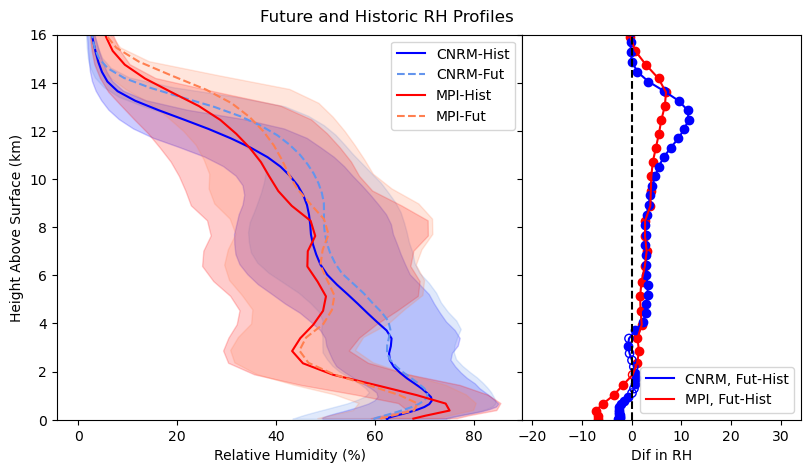

In [11]:
# Load the climate data from a NetCDF file
ds = xr.open_dataset(f"{stem}/Figure4_data.nc")

# Set up the figure and subplots
plt.rcParams["figure.figsize"] = [12, 5]  # Set figure size
fig, axs = plt.subplots(1, 2, sharey=True)  # Create subplots with shared y-axis
fig.subplots_adjust(wspace=0)  # Remove horizontal space between axes

# Adjust the size of the second subplot to make the difference graph smaller
chartBox = axs[1].get_position()
axs[1].set_position([chartBox.x0, chartBox.y0, chartBox.width * 0.6, chartBox.height])

# Extract geopotential height and RH data for historical and future scenarios
CNRM_hist_z = ds['CNRM-Hist_geopotential_height'].values
CNRM_fut_z = ds['CNRM-Fut_geopotential_height'].values
MPI_hist_z = ds['MPI-Hist_geopotential_height'].values
MPI_fut_z = ds['MPI-Fut_geopotential_height'].values

CNRM_hist_RH = ds['CNRM-Hist_RH'].values
CNRM_fut_RH = ds['CNRM-Fut_RH'].values
MPI_hist_RH = ds['MPI-Hist_RH'].values
MPI_fut_RH = ds['MPI-Fut_RH'].values

# Extract 25th and 75th percentiles of RH
CNRM_hist_p25 = ds['CNRM-Hist_25th_Percentile_of_RH'].values
CNRM_hist_p75 = ds['CNRM-Hist_75th_Percentile_of_RH'].values
CNRM_fut_p25 = ds['CNRM-Fut_25th_Percentile_of_RH'].values
CNRM_fut_p75 = ds['CNRM-Fut_75th_Percentile_of_RH'].values
MPI_hist_p25 = ds['MPI-Hist_25th_Percentile_of_RH'].values
MPI_hist_p75 = ds['MPI-Hist_75th_Percentile_of_RH'].values
MPI_fut_p25 = ds['MPI-Fut_25th_Percentile_of_RH'].values
MPI_fut_p75 = ds['MPI-Fut_75th_Percentile_of_RH'].values

# Exctract p-values
MPI_RH_pvalues = ds['MPI_RH_pvalues'].values
CNRM_RH_pvalues = ds['CNRM_RH_pvalues'].values

# Plot historical and future RH profiles for CNRM and MPI models
axs[0].plot(CNRM_hist_RH, CNRM_hist_z, color='blue', label='CNRM-Hist')
axs[0].plot(CNRM_fut_RH, CNRM_fut_z, color='cornflowerblue', label='CNRM-Fut', linestyle='--')
axs[0].plot(MPI_hist_RH, MPI_hist_z, color='red', label='MPI-Hist')
axs[0].plot(MPI_fut_RH, MPI_fut_z, color='coral', label='MPI-Fut', linestyle='--')

# Add shaded areas to represent the range between the 25th and 75th percentiles
axs[0].fill_betweenx(CNRM_hist_z, CNRM_hist_p25, CNRM_hist_p75, color='blue', alpha=0.2)
axs[0].fill_betweenx(CNRM_fut_z, CNRM_fut_p25, CNRM_fut_p75, color='cornflowerblue', alpha=0.2)
axs[0].fill_betweenx(MPI_hist_z, MPI_hist_p25, MPI_hist_p75, color='red', alpha=0.2)
axs[0].fill_betweenx(MPI_fut_z, MPI_fut_p25, MPI_fut_p75, color='coral', alpha=0.2)

# Calculate and plot the difference in RH between future and historical scenarios
cnrm_diff = CNRM_fut_RH - CNRM_hist_RH
mpi_diff = MPI_fut_RH - MPI_hist_RH
axs[1].plot(cnrm_diff, CNRM_hist_z, color='blue', label='CNRM, Fut-Hist')
axs[1].plot(mpi_diff, MPI_hist_z, color='red', label='MPI, Fut-Hist')
axs[1].plot([0, 0], [0, 16], linestyle='--', color='black')  # Add a dashed black line at 0


# Boolean arrays for condition
# Plot filled circles where p-value is less than 0.05, and unfilled in circles where p-value is greater than 0.05
less_than_005 = MPI_RH_pvalues < 0.05
greater_or_equal_005 = MPI_RH_pvalues >= 0.05
axs[1].scatter(mpi_diff[less_than_005], MPI_hist_z[less_than_005], color='red')
axs[1].scatter(mpi_diff[greater_or_equal_005], MPI_hist_z[greater_or_equal_005], facecolors='None', edgecolors='red')
less_than_005 = CNRM_RH_pvalues < 0.05
greater_or_equal_005 = CNRM_RH_pvalues >= 0.05
axs[1].scatter(cnrm_diff[less_than_005], CNRM_hist_z[less_than_005], color='blue')
axs[1].scatter(cnrm_diff[greater_or_equal_005], CNRM_hist_z[greater_or_equal_005], facecolors='None', edgecolors='blue')

# Configure plot aesthetics
fig.suptitle('Future and Historic RH Profiles', x=0.4, y=0.93)
axs[0].set_ylim(0, 16)
axs[0].set_xlabel('Relative Humidity (%)')
axs[0].set_ylabel('Height Above Surface (km)')
axs[0].legend()

axs[1].set_ylim(0, 16)
axs[1].set_xlabel('Dif in RH')
axs[1].set_xlim(-22,34)
axs[1].legend()